In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import append as append
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df_all = pd.read_csv('data/everything.csv')

C:\Users\Jacob\AppData\Local\Temp\ipykernel_70468\2945327670.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('data/everything.csv')


In [3]:
df_low_unemploy = df_all.query('Variable.str.startswith("Unemployment rate; low skilled") and Sex.str.startswith("T")')
df_med_unemploy = df_all.query('Variable.str.startswith("Unemployment rate; medium skilled") and Sex.str.startswith("T")')
df_high_unemploy = df_all.query('Variable.str.startswith("Unemployment rate; high skilled") and Sex.str.startswith("T")')

df_low_earn = df_all.query('Variable.str.startswith("Earnings; low skilled") and Sex.str.startswith("T")')
df_med_earn = df_all.query('Variable.str.startswith("Earnings; medium skilled") and Sex.str.startswith("T")')
df_high_earn = df_all.query('Variable.str.startswith("Earnings; high skilled") and Sex.str.startswith("T")')

In [4]:
df_low_earn = df_low_earn.rename(columns={'Value':'low_edu_earn'})
df_med_earn = df_med_earn.rename(columns={'Value':'med_edu_earn'})
df_high_earn = df_high_earn.rename(columns={'Value':'high_edu_earn'})

df_low_unemploy = df_low_unemploy.rename(columns={'Value':'low_edu_unemploy'})
df_med_unemploy = df_med_unemploy.rename(columns={'Value':'med_edu_unemploy'})
df_high_unemploy = df_high_unemploy.rename(columns={'Value':'high_edu_unemploy'})

In [5]:
df_low_earn = df_low_earn[['LOCATION','TIME','low_edu_earn']]
df_med_earn = df_med_earn[['LOCATION','TIME','med_edu_earn']]
df_high_earn = df_high_earn[['LOCATION','TIME','high_edu_earn']]

df_low_unemploy = df_low_unemploy[['LOCATION','TIME','low_edu_unemploy']]
df_med_unemploy = df_med_unemploy[['LOCATION','TIME','med_edu_unemploy']]
df_high_unemploy = df_high_unemploy[['LOCATION','TIME','high_edu_unemploy']]

In [6]:
df_low = pd.merge(df_low_unemploy,df_low_earn,left_on=['LOCATION','TIME'],right_on=['LOCATION','TIME'],how='inner')
df_med = pd.merge(df_med_unemploy,df_med_earn,left_on=['LOCATION','TIME'],right_on=['LOCATION','TIME'],how='inner')
df_high = pd.merge(df_high_unemploy,df_high_earn,left_on=['LOCATION','TIME'],right_on=['LOCATION','TIME'],how='inner')

In [7]:
df_total = pd.merge(df_high,df_med,left_on=['LOCATION','TIME'],right_on=['LOCATION','TIME'],how='inner')
df_total = pd.merge(df_total,df_low,left_on=['LOCATION','TIME'],right_on=['LOCATION','TIME'],how='inner') 

In [8]:
df_total

,LOCATION,TIME,high_edu_unemploy,high_edu_earn,med_edu_unemploy,med_edu_earn,low_edu_unemploy,low_edu_earn
0,FRA,2006,5.6,1.293513,7.7,0.895948,12.6,0.780462
1,FRA,2010,5.3,1.265067,8.4,0.865961,14.6,0.778837
2,IRL,2006,2.7,1.226000,4.2,0.825112,7.0,0.748138
3,IRL,2010,7.9,1.235626,16.2,0.828333,22.2,0.734435
4,ITA,2006,5.2,1.575809,6.2,0.957897,8.2,0.756910
...,...,...,...,...,...,...,...,...
57,PRT,2006,6.4,1.940487,8.5,0.961449,8.4,0.666075
58,PRT,2010,7.1,1.816878,11.4,0.941615,12.5,0.650466
59,ISL,2010,3.7,1.222634,7.6,0.994495,10.9,0.810127
60,SWE,2006,4.4,1.165520,6.5,0.909573,12.7,0.866310


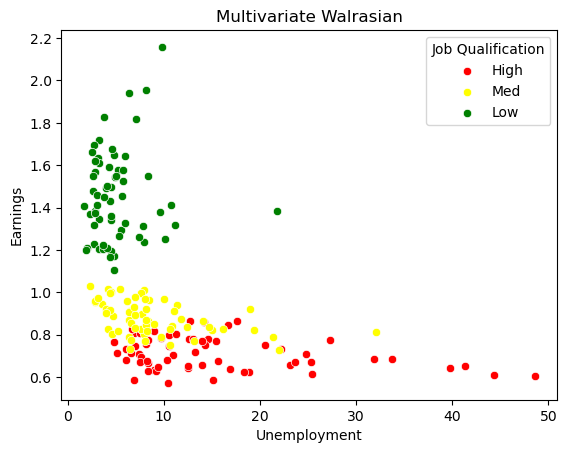

In [9]:
a = sns.scatterplot(data = df_low, x='low_edu_unemploy', y='low_edu_earn', color='red')
b = sns.scatterplot(data = df_med, x='med_edu_unemploy', y='med_edu_earn', color='yellow')
c = sns.scatterplot(data = df_high, x='high_edu_unemploy', y='high_edu_earn', color='green')
a.set(xlabel ="Unemployment", ylabel = "Earnings", title ='Multivariate Walrasian')
a.legend(title='Job Qualification', loc='upper right', labels=['High', 'Med','Low'])

[[-0.29961494]] [0.57448605] 0.4030811300456656


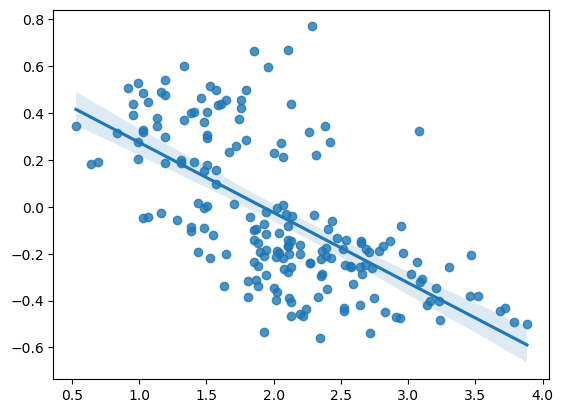

In [10]:
X = df_total.high_edu_unemploy.values
X = np.append(X,df_total.med_edu_unemploy.values)
X = np.append(X,df_total.low_edu_unemploy.values)

y = df_total.high_edu_earn.values
y = np.append(y,df_total.med_edu_earn.values)
y = np.append(y,df_total.low_edu_earn.values)

X = np.log(X).reshape(-1, 1)
y = np.log(y).reshape(-1, 1)
sns.regplot(x=X,y=y)
lm = LinearRegression()
lm.fit(X,y)
print(lm.coef_,lm.intercept_,lm.score(X,y))

Applyting exponentiation again to our variables gives us the following equation:
    $$
    UnemploymentRate = 1.776\times e^{0.741\cdot earned}
    $$